In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
lter=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\penguins\penguins_iter.csv')
size=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\penguins\penguins_size.csv')

In [4]:
lter.columns=lter.columns.str.title().str.replace(' ','').str.strip()
size.columns=size.columns.str.title().str.replace(' ','').str.strip()

In [5]:
lter.head()

,Studyname,SampleNumber,Species,Region,Island,Stage,IndividualId,ClutchCompletion,DateEgg,CulmenLength(Mm),CulmenDepth(Mm),FlipperLength(Mm),BodyMass(G),Sex,Delta15N(O/Oo),Delta13C(O/Oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [6]:
size.head()

,Species,Island,Culmen_Length_Mm,Culmen_Depth_Mm,Flipper_Length_Mm,Body_Mass_G,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Find correlation between penguins' body characteristics 

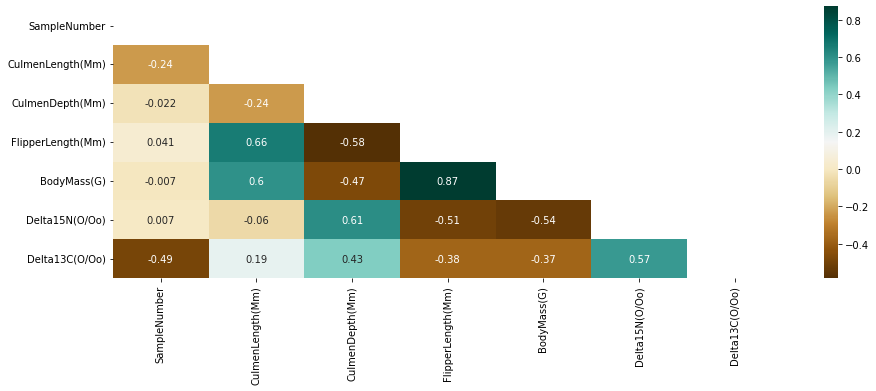

In [7]:
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(lter.corr(), dtype=np.bool))
sns.heatmap(lter.corr(),annot=True,cmap='BrBG',mask=mask)
plt.show()

# Plot the distribution of birds' masses by Sex

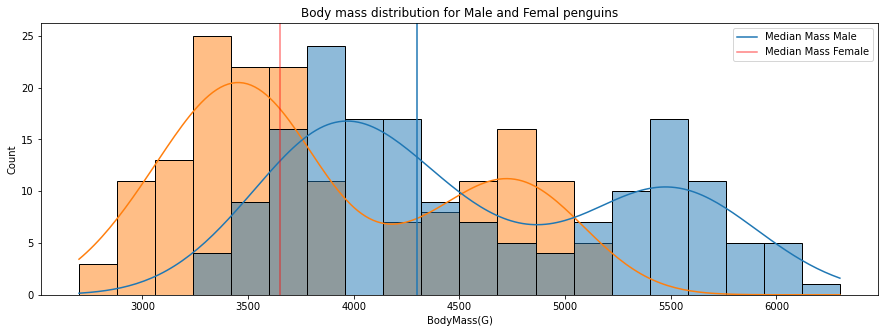

In [8]:
plt.figure(figsize=(15,5))
sns.histplot(data=lter[lter.Sex.isin(['MALE','FEMALE'])],x='BodyMass(G)',hue='Sex',kde='True',bins=20,legend=True)
plt.axvline(lter[lter.Sex=='MALE']['BodyMass(G)'].median(),label='Median Mass Male',)
plt.axvline(lter[lter.Sex=='FEMALE']['BodyMass(G)'].median(),label='Median Mass Female',color='red',alpha=0.5)
plt.legend()
plt.title('Body mass distribution for Male and Femal penguins')
plt.show()

In [9]:
# as expected, male birds' average mass is bigger than of female birds' 

# Find correlation between bird's body mass and flipper length 

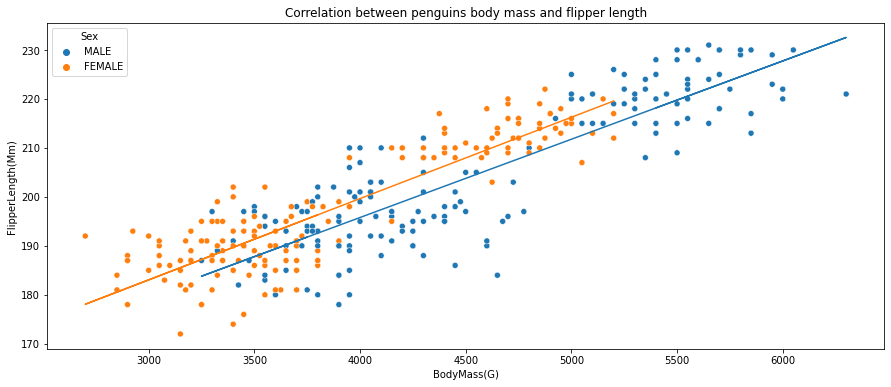

In [10]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=lter[lter.Sex.isin(['MALE','FEMALE'])],x='BodyMass(G)',y='FlipperLength(Mm)',hue='Sex',legend=True)

x_male=lter[lter.Sex.isin(['MALE'])]['BodyMass(G)']
y_male=lter[lter.Sex.isin(['MALE'])]['FlipperLength(Mm)']
x_female=lter[lter.Sex.isin(['FEMALE'])]['BodyMass(G)']
y_female=lter[lter.Sex.isin(['FEMALE'])]['FlipperLength(Mm)']


m_male, b_male = np.polyfit(x_male, y_male, 1)
m_female, b_female = np.polyfit(x_female, y_female, 1)


plt.plot(x_male, m_male*x_male+b_male,label='Male')
plt.plot(x_female, m_female*x_female+b_female,label='Female')

plt.title('Correlation between penguins body mass and flipper length')

plt.show()

# Visualize distribution of weight by species and sex 

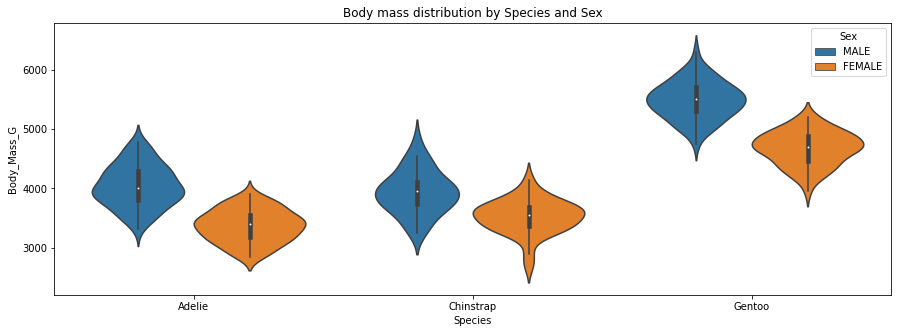

In [11]:
plt.figure(figsize=(15,5))
sns.violinplot(data=size[size.Sex.isin(['MALE','FEMALE'])],x='Species',y='Body_Mass_G',hue='Sex')
plt.title('Body mass distribution by Species and Sex')
plt.show()

# Visualize correlation between multiple columns 

<Figure size 1500x1500 with 0 Axes>

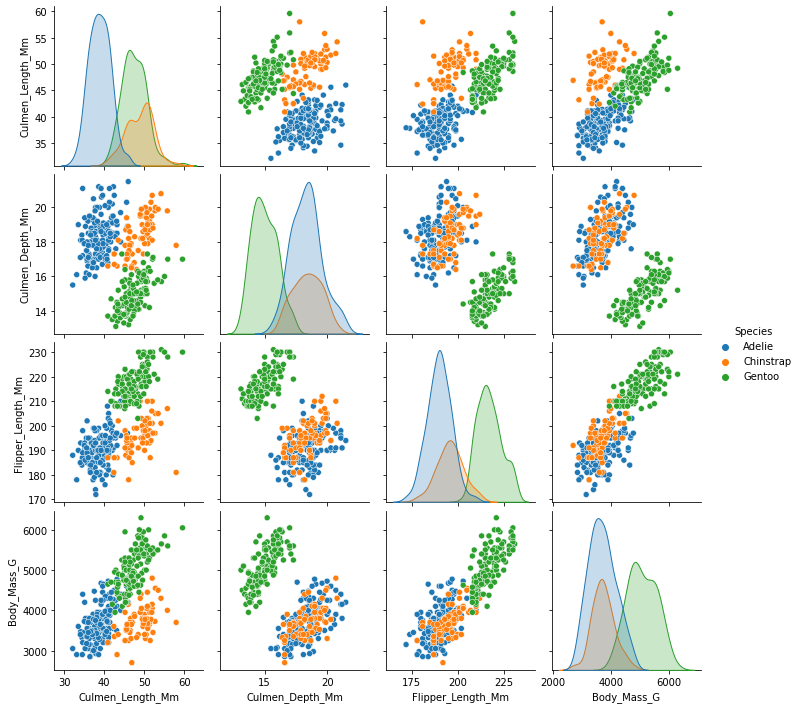

In [12]:
plt.figure(figsize=(15,15),dpi=100)
sns.pairplot(data=size, hue = 'Species')
plt.show()